In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tvDatafeed import TvDatafeed, Interval

tv = TvDatafeed()

you are using nologin method, data you access may be limited


In [4]:
cpi = tv.get_hist(
    symbol = 'USCPI',
    exchange = 'ECONOMICS',
    n_bars = 1200,
    interval = Interval.in_daily
)
cpi.index = pd.to_datetime(cpi.index.strftime('%Y-%m-%d'))

In [9]:
cpi_yoy = cpi['close'].resample('ME').ffill().pct_change(12)

<Axes: xlabel='datetime'>

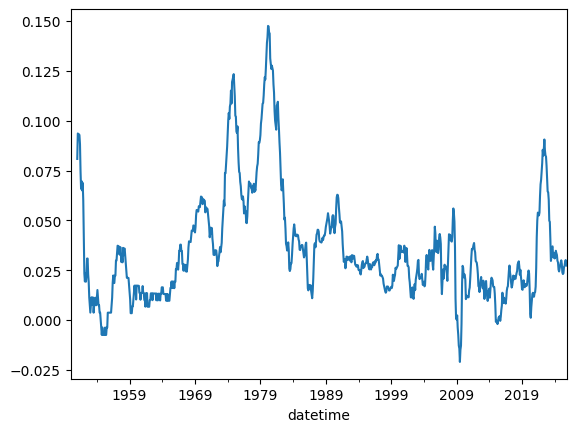

In [11]:
cpi_yoy.plot()

In [14]:
oil = tv.get_hist(
    symbol = 'WTI',
    exchange = 'CFI',
    n_bars = 10000,
    interval = Interval.in_daily
)
oil.index = pd.to_datetime(oil.index.strftime('%Y-%m-%d'))

In [20]:
oil_month = oil['close'].resample('ME').last()
oil_yoy = oil_month.pct_change(12, fill_value=None)

/var/folders/1q/pl9tj55n57s9jg28npxw61n80000gn/T/ipykernel_51919/2754953001.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  oil_yoy = oil_month.pct_change(12, fill_value=None)


<Axes: >

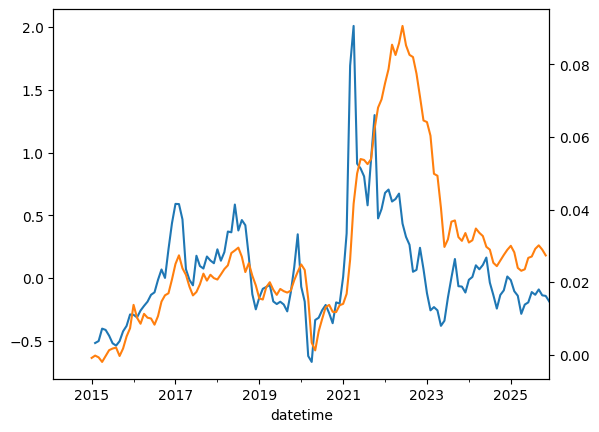

In [25]:
oil_yoy.plot()
cpi_yoy.loc['2015':].plot(secondary_y=True)

In [29]:
mbs = tv.get_hist(
    symbol="MORTGAGE30US",
    exchange="FRED",
    n_bars = 15000,
    interval = Interval.in_daily
)
mbs.index = pd.to_datetime(mbs.index.strftime('%Y-%m-%d'))

In [37]:
mbs_month = mbs['close'].resample('ME').last()
mbs_yoy = mbs_month.pct_change(12, fill_value=None)

<Axes: >

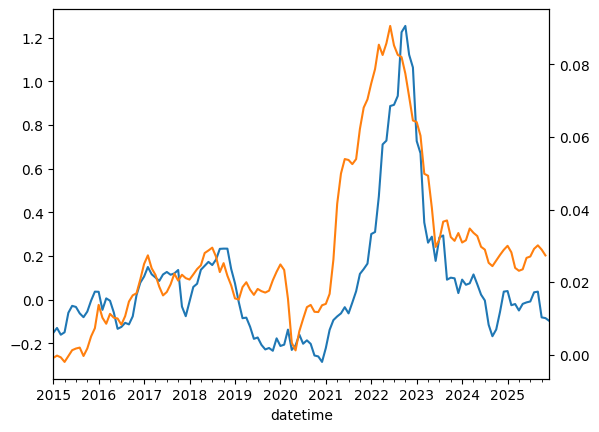

In [38]:
mbs_yoy.loc['2015':].plot()
cpi_yoy.loc['2015':].plot(secondary_y=True)